In [1]:
import pandas as pd

df = pd.read_csv("expense_data_1.csv")  # Replace with file dialog if using Tkinter
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date', 'Amount'], inplace=True)
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [2]:
# Pivot table: Total amount spent per day per category
pivot_table = pd.pivot_table(df, values='Amount', index='Date', columns='Category', aggfunc='sum', fill_value=0)
pivot_table.head()

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Date,,,,,,,,,,,,,
2021-11-21 13:30:00,0,0,0,0,0.0,0,0,2000,0,0,0,0.0,0.0
2021-11-21 15:50:00,0,0,0,0,875.0,0,0,0,0,0,0,0.0,0.0
2021-11-21 17:07:00,0,0,0,0,0.0,0,0,0,0,0,0,0.0,130.0
2021-11-22 14:16:00,0,0,0,0,187.0,0,0,0,0,0,0,0.0,0.0
2021-11-23 22:53:00,0,0,0,0,179.0,0,0,0,0,0,0,0.0,50.0


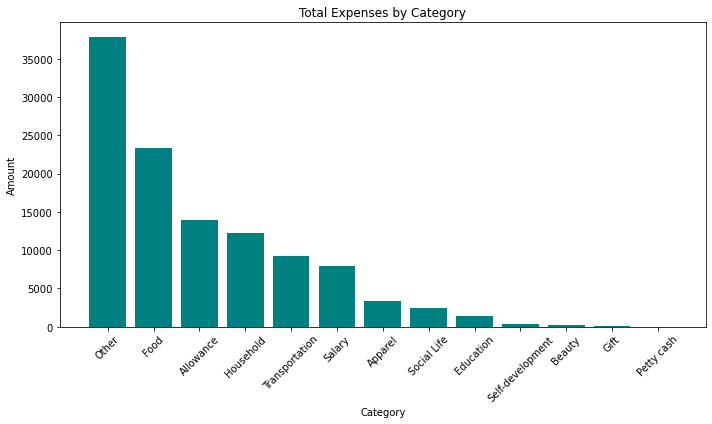

In [3]:
import matplotlib.pyplot as plt

# Group by category for bar chart
category_summary = df.groupby('Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Save bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_summary['Category'], category_summary['Amount'], color='teal')
plt.title("Total Expenses by Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("category_chart.png")
plt.show()

In [4]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

with pd.ExcelWriter("Enhanced_Expense_Report.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Raw Data')
    category_summary.to_excel(writer, index=False, sheet_name='Summary')
    pivot_table.to_excel(writer, sheet_name='Pivot Table')
    df.describe().to_excel(writer, sheet_name='Statistics')

# Insert image into Summary sheet
wb = load_workbook("Enhanced_Expense_Report.xlsx")
ws = wb['Summary']
img = Image("category_chart.png")
ws.add_image(img, 'E2')
wb.save("Enhanced_Expense_Report.xlsx")